# Wheel Overpoint Calculator

## Fill out the information below:

In [ ]:
# Ship length in meters.
shipLength = 205.8

# Ship turining ratius in meters.
shipRadius = 420

# Ship cruising speed in knots.
shipSpeed = 18

# Coordinates of starting point on the form [x, y]
startCoordinates = [12, 2]

# Coordinates of turning point on the form [x, y]
turnCoordinates = [16, 4]

# Coordinates of target point on the form [x, y]
targetCoordinates = [20, 12]

## Run the code above, then the code below to calculate:

Breddegrad: N30° N0'
Lengdegrad: Ø20° Ø0'
Middelbredde: -5.0
Avvikning: 1195.43
Kvadrantkurs: 33.59°


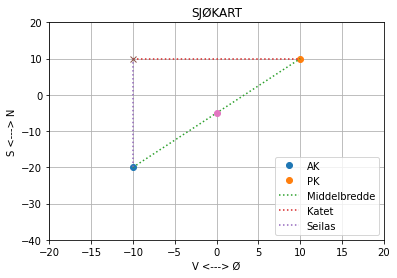

In [90]:
import math
import numpy as np
import statistics as st
import matplotlib.pyplot as plt         
degree_sign = u'\N{DEGREE SIGN}'


# Coordinates for start point
Ydeg1 = -20
Ymin1 = 0
Xdeg1 = -10
Xmin1 = 0

# Coordinates for target point
Ydeg2 = 10
Ymin2 = 0
Xdeg2 = 10
Xmin2 = 0


# Function for calculating coordinate difference
def Ycalculate(Ydeg1, Ydeg2, ymin1, ymin2, upwards): 

    # Middelbredde
    dd1 = Ydeg1 + ymin1/60
    dd2 = Ydeg2 + ymin2/60

    if (dd1 >= 0 and dd2 >= 0):
        c = -1
    elif (dd1 < 0 and dd2 < 0):
        c = -1
    else:
        c = 1


    middelbredde = (dd2 + c*dd1)/2


    totDeg = (Ydeg2 - Ydeg1)
    totMin = ymin2-ymin1

    while (totMin >= 60):
        totDeg += 1
        totMin -= 60

    while (totMin <= -60):
        totDeg -= 1
        totMin += 60


    if (upwards == False):
        if (totDeg >= 180 or totDeg <= -180):

            if (totDeg >= 0):
                c = -1
            else:
                c = 1

            totDeg = totDeg + 360*(c) 

    return totDeg, totMin, middelbredde


yd,ym,ymb = Ycalculate(Ydeg1, Ydeg2, Ymin1, Ymin2, True)
xd,xm,xmb = Ycalculate(Xdeg1, Xdeg2, Xmin1, Xmin2, False)



if (yd >= 0):
    bfd = 'N'
else:
    bfd = 'S'

if (ym >= 0):
    bfm = 'N'
else:
    bfm = 'S'


if (xd >= 0):
    lfd = 'Ø'
else:
    lfd = 'V'

if (xm >= 0):
    lfm = 'Ø'
else:
    lfm = 'V'


s1 = str(bfd + str(yd) + str(degree_sign) + " ") + str(bfm + str(ym) + '\'')
s2 = str(lfd + str(xd) + str(degree_sign) + " ") + str(lfm + str(xm) + '\'')

print("Breddegrad:", s1)
print("Lengdegrad:", s2)
print("Middelbredde:", ymb)

x1 = Xdeg1 + Xmin1/60
x2 = Xdeg2 + Xmin2/60
ax = (x1+x2)/2

y1 = Ydeg1 + Ymin1/60
y2 = Ydeg2 + Ymin2/60
ay = (y1+y2)/2



lengdeMin = xd*60 + xm 
katet = lengdeMin * np.cos(ymb * math.pi/180)
print("Avvikning:", round(katet,2))
kk = np.arctan(katet / ((yd*60 + ym))) * 180/math.pi
print("Kvadrantkurs:", str(round(kk,2)) + degree_sign)

plt.title("SJØKART")
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'o')
plt.plot([x1,x2], [y1,y2], ':')
plt.plot([x1,x2], [y2,y2], ':')
plt.plot([x1,x1], [y1,y2], ':')
plt.plot(x1, y2, 'x')
plt.plot(ax, ymb, 'o')
plt.xlabel('V <---> Ø')
plt.ylabel('S <---> N')
plt.legend(["AK", "PK", "Middelbredde", "Katet", "Seilas"])
plt.xlim(2*min([x1,x2]), 2*max([x1,x2]))
plt.ylim(2*min([y1,y2]), 2*max([y1,y2]))
plt.grid()
plt.show()
